# Problema 1 - 2023
Explique el método de interpolación de Lagrange y, con ejemplos, por qué es útil en ciencias básicas e ingeniería. Las aplicaciones pueden ser fundamentales o prácticas. Asuma que los estudiantes saben usar numpy y matplotlib, pero no scipy, y que además ya vieron cursos básicos de matemáticas. Para ilustrar los conceptos, proponga algún problema sencillo de su preferencia y resuélvalo numéricamente usando librerías de interpolación de scipy. El sistema debe ser bien comportado y ejemplificar alguna aplicación, así sea menor, en 
matemáticas, ciencia o ingeniería. Finalmente, explique bajo cuáles circunstancias falla este método de interpolación y cómo puede ser mejorado (aquí puede discutir otros métodos de 
interpolación más avanzados).

# Solución

La interpolación de Lagrange es un método numérico de aproximación de funciones el cual hace uso de un polinomio $p(x)$ de grado $n$ para aproximar una función $f(x)$ en un intervalo $[a,b]$ que pasa por $n+1$ puntos conocidos, siempre que la función a aproximar sea continua y diferenciable en el intervalo $[a,b]$.

Dados los los puntos $\{(x_0,y_0),(x_1,y_1),...,(x_n,y_n)\}$, con $x_i\in [a,b]$ y $y_i=f(x_i)$, y $x_i\neq x_j$ para $i\neq j$, $\forall i,j\in\{0,1,...,n\}$, el polinomio $p(x)$ se define como:
$$
P(x)=\sum_{i=0}^{n}y_iL_i(x)
$$
donde $L_i(x)$ son los polinomios de Lagrange definidos como:
$$
L_i(x)=\prod_{j=0,j\neq i}^{n}\frac{x-x_j}{x_i-x_j}.
$$

Este método es útil en ciencias básicas e ingeniería ya que permite aproximar funciones de manera sencilla y rápida, además de que es un método muy versátil ya que se puede utilizar para aproximar funciones de cualquier tipo, ya sean funciones trigonométricas, exponenciales, logarítmicas, etc.

# Ejemplo 1
Un ejemplo práctico podría ser el uso del método para aproximar la curva que describe el movimiento de un objeto en el espacio. Al tener una serie de puntos conocidos del objeto en diferentes momentos, se puede utilizar la interpolación de Lagrange para obtener un polinomio que describa su trayectoria. Esto puede ser útil en campos como la física y la ingeniería mecánica.

Supongamos una partícula que se mueve dibujando la siguiente trayectoria, parametrizada por el tiempo $t$ en algún sistema de unidades:
$$
y= 3e^{-0.4t}\sin(\pi t/3), \quad x= 3e^{-0.4t}\cos(\pi t/3)
$$
y supongamos que se conocen los puntos de la trayectoria para tiempos $t=0,1,2,3,4,5,6,7,8,9,10$. Calculemos estos puntos conocidos usando numpy:

In [26]:
import numpy as np

t_step = 1
t_dat = np.arange(0, 10 + t_step, t_step)

y_dat = 3*np.exp(-0.4*t)*np.sin( np.pi*t/3)
x_dat = 3*np.exp(-0.4*t)*np.cos( np.pi*t/3)

Y dibujémoslos usando matplotlib:

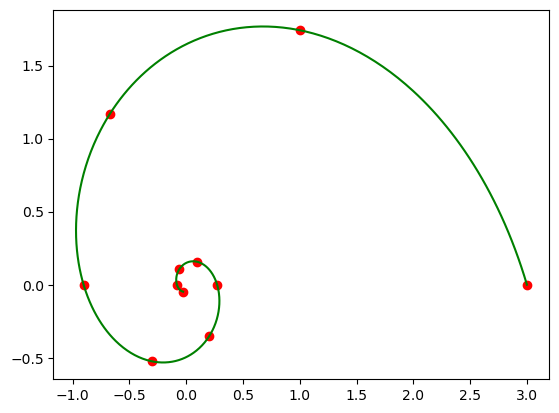

In [36]:
import matplotlib.pyplot as plt

# plot scatter of points x,y
plt.scatter(x_dat, y_dat, color='red', label='data')

# plot the original function
step = 0.01
t_org = np.arange(0, 10+step, step)
y_org = 3*np.exp(-0.4*t_org)*np.sin( np.pi*t_org/3)
x_org = 3*np.exp(-0.4*t_org)*np.cos( np.pi*t_org/3)
plt.plot(x_org, y_org, color='green', label='original')

Usemos ahora el método de los polinomios de lagrange para interpolar las funciones paramétricas $x(t)$ y $y(t)$:

- Definamos primero los $L_i(t)$
$$
L_i(t, \{t_i\}) = \prod_{j=0,j\neq i}^{n}\frac{t-t_j}{t_i-t_j}
$$

In [28]:
# funcion para calcular el polinomio de Lagrange
def l_i(t, t_dat, i):
    """
    Calcula el i-ésimo Polinomio de Lagrange en el punto x
    """
    # declaremos una variable para guardar el resultado
    result = 1
    # hagamos un loop sobre todos los puntos para calcular el producto
    for j in range(len(t_dat)):
        # debemos saltar el i-ésimo punto
        if i == j:
            continue
        # calculemos el producto
        result *= (t - t_dat[j]) / (t_dat[i] - t_dat[j])
    return result

- Definamos ahora el Polinomio interpolador $P(t)$ que podremos usar ambas funciones $x(t)$ y $y(t)$

In [29]:
def P(t, t_dat, f_dat):
    """
    Calcula el Polinomio de Lagrange
    """
    # inicialicemos una variable para guardar el resultado
    result = 0
    # hagamos un loop sobre todos los puntos
    for i in range(len(f_dat)):
        # calculemos el producto
        result += f_dat[i] * l_i(t, t_dat, i)
    return result


- Definamos las funciones de interpolación $x(t)$ y $y(t)$:

In [30]:
def x_interpolada(t):
    return P(t, t_dat, x_dat)

def y_interpolada(t):
    return P(t, t_dat, y_dat)

- Grafiquemos los puntos de la trayectoria original y tiempos intermedios:

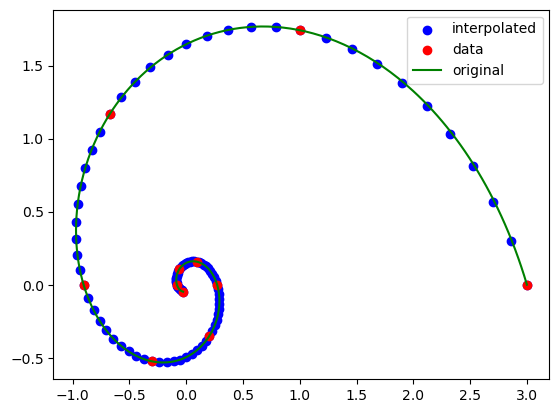

In [33]:

#Calculemos puntos intermedios
step = 0.1
t_new = np.arange(0, 10+step, step)

x_new = x_interpolada(t_new)
y_new = y_interpolada(t_new)

# Grafiquemos los puntos intermedios
plt.scatter(x_new, y_new, color='blue', label='interpolated')

# Grafiquemos los puntos originales
plt.scatter(x_dat, y_dat, color='red', label='data')

# Grafiquemos la función original
plt.plot(x_org, y_org, color='green', label='original')

# add legend
plt.legend()

**Sorprendente cómo con sólo unos pocos puntos hemos podido interpolar a la perfección dos funciones dadas. Esto es lo que hace tan útil a la interpolación de Lagrange.**